In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Example of liner regression
Let's generate so random data first

In [3]:
#set a random number seed
np.random.seed(119)

#set number of data points
npoints=50

#set x
x=np.linspace(0,10,npoints)

#set slope, intercept, and scatter rms
m=2.0
b=1.0
sigma=2.0

#generatey points
y=m*x+b+np.random.normal(scale=sigma,size=npoints)
y_err=np.full(npoints,sigma)

### Let's just plot the data first

Text(0, 0.5, 'y')

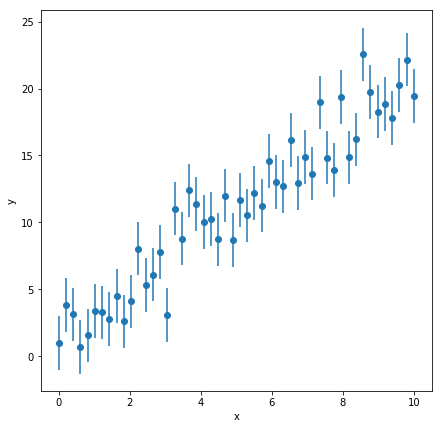

In [5]:
f=plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

## Method #1, polyfit()

In [6]:
m_fit, b_fit=np.poly1d(np.polyfit(x,y,1,w=1/y_err)) #weight with uncertainties
print(m_fit, b_fit)

y_fit=m_fit*x+b_fit

1.9634043470399505 1.283010681296193


## Plot Result

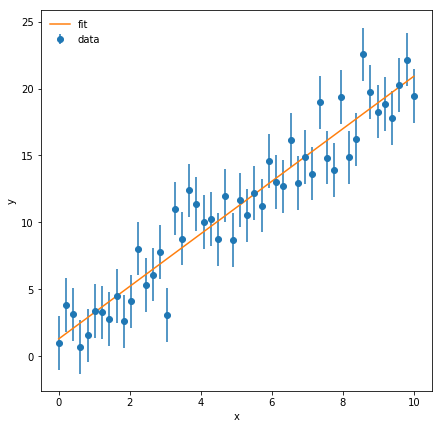

In [8]:
f=plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit, label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

## A new Hope: linear Regression

In [11]:
m_a=0.0
m_B=0.0
m_C=0.0
m_D=0.0

m_A=np.sum(x*y)
m_B=np.sum(x)*np.sum(y)
m_C=np.sum(x*x)
m_D=np.sum(x)**2

m_fit_lr=(float(npoints)*m_A-m_B)/(float(npoints)*m_C-m_D)

y_mean=np.mean(y)
x_mean=np.mean(x)

b_fit_lr=y_mean-m_fit_lr*x_mean

y_fit_lr=m_fit_lr*x+b_fit_lr

print(m_fit_lr,b_fit_lr)


1.9634043470399514 1.2830106812961954


## Plot the result

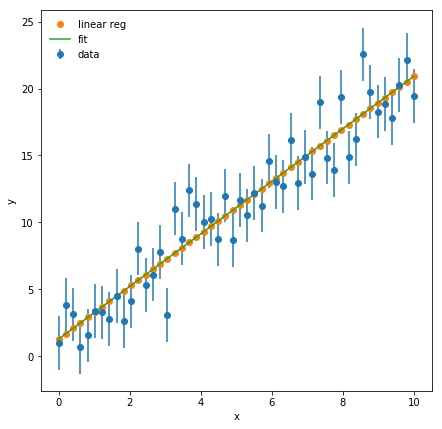

In [14]:
f=plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit_lr,'o',label='linear reg')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)